# 서울시 반려동물 가구 분석

* 서울서베이 : 2019년 서울에 거주하고 있는 2만가구의 15세 이상 가구원 약 4만 3천여명과 외국인 2,500명을 대상으로 실시한 도시정책지표조사 자료. 조사결과는 가구주와 가구원, 외국인 조사로 구분.
* 서울서베이 도시정책지표조사 정보 (2019년) 설문 data를 통해 서울시에 반료동물을 기르는 가구에 대한 분석
* 가구주 응답 데이터를 분석에 활용
* [DATA](http://data.seoul.go.kr/dataList/OA-15989/F/1/datasetView.do#)

## 설문조사 결과를 분석하여 반려동물을 기르는 가구의 특성을 살펴보고자 함 
* 반려동물을 키우는 가구는 지역, 가구구성원수, 소득 등의 요소에서 통제집단과 차이점을 보일 것이다 라고 가설 설정.
* 분석을 통해 얻은 인사이트로 반려동물을 위한 시설 및 서비스, 정책 개발 등에 활용될 수 있도록 함



# 라이브러리 로드

In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# 노트북에 그래프를 출력하기위해 
%matplotlib inline

# 폰트 설정 
%config InlineBackend.gigure_format="retina"
sns.set(font="Malgun Gothic")

In [2]:
# 파일 불러오기
df = pd.read_csv('data/seoul_survey_2019.csv')
df.shape

(20000, 106)

In [3]:
df.head()

,date,ID,GU,FAM1,FAM2,SQ0_2,SQ0_3,SQ1_1,SQ1_2,SQ1_3,...,Q7_2A42,Q8A1,Q8A2,Q9,AQ1,AQ1A,A_DQ1,A_DQ3,wta1,wta2
0,20200527,1,110,2,2,1,1,1,1,1945,...,NaN,NaN,NaN,NaN,6,NaN,4,12,75.030,0.391
1,20200527,2,110,3,3,1,1,1,1,1962,...,NaN,NaN,NaN,NaN,8,NaN,5,5,29.759,0.155
2,20200527,3,110,5,5,1,1,1,1,1961,...,NaN,NaN,NaN,NaN,13,NaN,4,4,215.428,1.122
3,20200527,4,110,4,2,1,2,1,1,1978,...,NaN,NaN,NaN,NaN,12,NaN,5,3,66.538,0.347
4,20200527,5,110,3,3,1,1,1,1,1950,...,NaN,NaN,NaN,NaN,8,NaN,6,5,39.131,0.204


In [4]:
# 유니크키 ID로 중복된 데이터 없음 총 20000행 
len(df['ID'].unique())

20000

In [5]:
# null값 확인 
null_count  = df.isnull().sum()

null_count[null_count > 0]




SQ2_1       3629
SQ2_2       3629
SQ2_3       3629
SQ2_4       3629
SQ2_5       3629
           ...  
Q7_2A42    15977
Q8A1       16436
Q8A2       16436
Q9         16436
AQ1A       19627
Length: 78, dtype: int64

# 성별

In [98]:
df.loc[df["SQ1_2"] == 1, "성별"] = "남"
df.loc[df["SQ1_2"] == 2, "성별"] = "여"

In [99]:
df["성별"].value_counts(normalize = True)

남    0.8046
여    0.1954
Name: 성별, dtype: float64

전체 응답자의 80.4%가 남성 19.5&가 여성

In [100]:
gender = df.groupby(["FAM1", "성별"])["ID"].count().unstack()

gender["전체"] = gender["남"] + gender["여"] 

gender["남%"] = gender["남"] / gender["전체"] * 100
gender["여%"] = gender["여"] / gender["전체"] * 100
gender

성별,남,여,전체,남%,여%
FAM1,,,,,
1,1424.0,2140.0,3564.0,39.955107,60.044893
2,4682.0,949.0,5631.0,83.146866,16.853134
3,5324.0,529.0,5853.0,90.961900,9.038100
4,4167.0,214.0,4381.0,95.115270,4.884730
5,426.0,68.0,494.0,86.234818,13.765182
6,61.0,8.0,69.0,88.405797,11.594203
7,8.0,NaN,NaN,NaN,NaN


가구주의 성별은 대체로 남성이 많은 편이었지만 1인가구에서는 남여의 비율이 4:6 정도로 나타남.
결혼 후 세대주를 남편으로 하는 경향이 많기 때문 

In [75]:
df.loc[df["FAM1"] == 1 ,"SQ1_2"].value_counts(normalize=True)

2    0.600449
1    0.399551
Name: SQ1_2, dtype: float64

# 가구원 수
* 설문지 'FAM1' 문항으로 가구원수를 구분해 분석에 이용

In [6]:
# 가구원 수 'FAM1' :  전체가구원수
# 전체 응답자에 대해서 가구원수 구분에 의한 응답수 빈도분석
df_family_count = pd.DataFrame(df['FAM1'].value_counts())

df_family_per = pd.DataFrame(df['FAM1'].value_counts(normalize=True))

df_family = df_family_count.merge(
    df_family_per, left_index=True, right_index=True)

df_family.columns = ['응답수', '비율']

df_family

,응답수,비율
3,5853,0.29265
2,5631,0.28155
4,4381,0.21905
1,3564,0.17820
5,494,0.02470
6,69,0.00345
7,8,0.00040


전체 응답자를 분석한 결과 3인 가구가 29.2%, 2인가구 28.1%, 4인가구가 21.9%로 나타남. 1인 가구의 수는 3564 가구로 전체의 17.8%이며 5인 가구 이상은 3%이하 이다. 

In [7]:
# 총가구원 수, 평균 가구원 수 구하기
print("총 가구원수 : ", sum(df_family.index * df_family["응답수"]))
print("평균 가구원수", sum(df_family.index * df_family["응답수"])/ 20000)

총 가구원수 :  52849
평균 가구원수 2.64245


전체응답자 2만 가구의 가구원수의 합은 52,849명. 평균 가구원수는 2.64명이다.

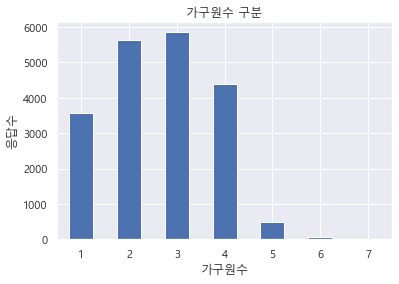

In [8]:
# 가구원수 구분에 따른 가구수 시각화 
df_family["응답수"].sort_index().plot.bar(rot=0)
plt.title("가구원수 구분")
plt.xlabel("가구원수")
plt.ylabel("응답수")
plt.show()

# 반려동물 유무
* 설문지 문7(반려동물 유무 : 1.있다, 2.없다)으로 반려동물 유무를 구분해 분석에 활용

In [9]:
# 반려동물 유무 숫자로 코딩되어있는 응답을 "Y", "N"으로 변경
df.loc[df['Q7'] == 1, "반려동물유무"] = "Y"
df.loc[df['Q7'] == 2, "반려동물유무"] = "N"

df["반려동물유무"]

0        N
1        N
2        N
3        N
4        N
        ..
19995    N
19996    N
19997    N
19998    N
19999    Y
Name: 반려동물유무, Length: 20000, dtype: object

In [10]:
# "반려동물유무" 응답의 빈도수 구하기
pet_count = df["반려동물유무"].value_counts()
df_pet_count = pet_count.to_frame("응답수")
pet_count_per = df["반려동물유무"].value_counts(normalize=True)
df_pet_count_per = pet_count_per.to_frame("비율")
df_pet_count.merge(df_pet_count_per, left_index=True, right_index=True)

,응답수,비율
N,15977,0.79885
Y,4023,0.20115


20,000 가구 중 반려동물을 키우는 가구는 4023 가구로 전체의 20.1%이다.

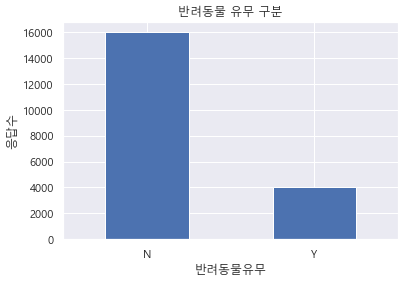

In [11]:
# 반려동물유무 시각화 
pet_count = df["반려동물유무"].value_counts()
pet_count.plot.bar(rot=0)
plt.title("반려동물 유무 구분")
plt.xlabel("반려동물유무")
plt.ylabel("응답수")
plt.show()

# 반려동물 유무에 따른 가구원수 구분
* 반려동물을 키우는 가구를 가구원수로 구분

In [12]:
# 반려동물을 키우고 있는 가구의 가구원 수 비율

df_pet = df[df['반려동물유무'] == "Y"].copy()


df_family_count_pet = pd.DataFrame(df_pet['FAM1'].value_counts())

df_family_per_pet = pd.DataFrame(df_pet['FAM1'].value_counts(normalize=True))

df_family_pet = df_family_count_pet.merge(
    df_family_per_pet, left_index=True, right_index=True)

df_family_pet.columns = ['응답수', '비중']


df_family_pet

,응답수,비중
2,1204,0.299279
3,1135,0.282128
4,801,0.199105
1,771,0.191648
5,102,0.025354
6,10,0.002486


반려동물을 키우고 있는 가구 총합을 기준으로 가구원수에 따라 구분을 하면, 2인가구가 29.9%로 가장 많고, 3인 가구 28.2% 4인가구 19.9% 순이었다.

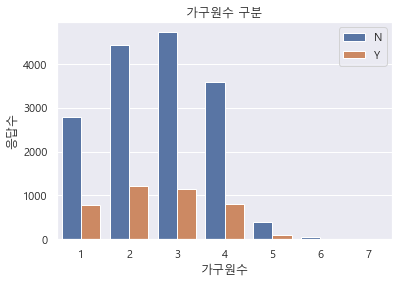

In [13]:
# 전체 가구의 가구인수 구분, 반려동물을 키우는 가구의 가구인수 구분 시각화
sns.countplot(data=df, x= 'FAM1', hue='반려동물유무')
plt.legend(loc= "upper right")
plt.title("가구원수 구분")
plt.xlabel("가구원수")
plt.ylabel("응답수")
plt.show()

```
반려동물은 키우지 않는 가구는 3인 가구가 가장 많고 반려동물을 키우는 가구는 2인 가구가 가장 많음. 반려동물 유무에 따라 2,3인 가구의 순위 변경이 있는 것은 특징적인 부분. 
하지만 전체 모집단의 가구원수 분포를 따라갈 수 있기 때문에 가구수 구분 안에서 반려동물 유무의 비율을 살펴보아야 한다.
```

In [102]:
df.loc[df["FAM1"] == 1, :].groupby(["성별", "반려동물유무"])["ID"].count().unstack()

반려동물유무,N,Y
성별,,
남,1170,254
여,1623,517


## 반려동물을 키우는 비율이 높은 가구는?
* 가구원수 구분 안에서 반려동물을 키우는 가구의 비율을 본다.

In [14]:
# 반려동물 유무여부와 가구구성원수로 그루핑
fam_pet_group = df.groupby(["FAM1", '반려동물유무'])["ID"].count().unstack()
fam_pet_group["전체"] = fam_pet_group["N"] + fam_pet_group["Y"]
fam_pet_group["Y_비율"] = fam_pet_group["Y"] / fam_pet_group["전체"]
fam_pet_group.sort_values("Y_비율", ascending= False)

반려동물유무,N,Y,전체,Y_비율
FAM1,,,,
1,2793.0,771.0,3564.0,0.216330
2,4427.0,1204.0,5631.0,0.213816
5,392.0,102.0,494.0,0.206478
3,4718.0,1135.0,5853.0,0.193918
4,3580.0,801.0,4381.0,0.182835
6,59.0,10.0,69.0,0.144928
7,8.0,NaN,NaN,NaN



가구수 구분 안에서 반려 동물 Y의 비율을 보면 1인 가구가 21.6%로 가장 높았다. 1인, 2인, 5인 가구 순으로 반려 동물을 키우는 가구 비율이 높은 것을 알 수 있다.


반려 동물을 키우는 절대적인 가구수 수 기준에서는 2인 가구가 가장 많고, 비율로 보면 반려동물을 키우고 있을 확율이 가장높은 가구는 1인 가구이다. 

## 1인가구에서 반려동물을 기르는 비율이 높은 성별은?

In [116]:
# 1인가구로 추출한 데이터에 성별과 반려동물유무로 그룹핑하여 살펴본다.
fam1_group = df.loc[df["FAM1"] == 1, :].groupby(["성별", "반려동물유무"])["ID"].count().unstack()
fam1_group["전체"] = fam1_group["Y"] + fam1_group["N"]
fam1_group
fam1_group["N%"] = fam1_group["N"] / fam1_group["전체"] * 100
fam1_group["Y%"] = fam1_group["Y"] / fam1_group["전체"] * 100
fam1_group

반려동물유무,N,Y,전체,N%,Y%
성별,,,,,
남,1170,254,1424,82.162921,17.837079
여,1623,517,2140,75.841121,24.158879


여성 1인 가구 중 반려동물을 키우는 비율은 24.16%, 남성 1인 가구는 17.8%이다. 

# 지역에 따른 구분
* 어느 지역에 반려동물을 키우는 가구가 많은지 분석

## 지역코드 변환
* 행정구역 응답

```
110.종로구
140.중구
170.용산구
200.성동구
215.광진구
230.동대문구
260.중랑구
290.성북구
305.강북구
320.도봉구
350.노원구
380.은평구
410.서대문구
440.마포구
470.양천구
500.강서구
530.구로구
545.금천구
560.영등포구
590.동작구
620.관악구
650.서초구
680.강남구
710.송파구
740.강동구

```

In [15]:
# 지역구분이 코드로 되어 있어 알아보기 힘듬
# 설문지 데이터 코딩북을 참고하여 지역명을 달아주도록함
df['GU']

0        110
1        110
2        110
3        110
4        110
        ... 
19995    740
19996    740
19997    740
19998    740
19999    740
Name: GU, Length: 20000, dtype: int64

In [16]:
#코드 리스트 만들기 
gu_code = df['GU'].unique()
gu_code


array([110, 140, 170, 200, 215, 230, 260, 290, 305, 320, 350, 380, 410,
       440, 470, 500, 530, 545, 560, 590, 620, 650, 680, 710, 740],
      dtype=int64)

In [17]:
# 지역이름 리스트 만들기 
gu_name = "종로구 중구 용산구 성동구 광진구 동대문구 중랑구 성북구 강북구 도봉구 노원구 은평구 서대문구 마포구 양천구 강서구 구로구 금천구 영등포구 동작구 관악구 서초구 강남구 송파구 강동구"
gu_name = gu_name.split(" ")
gu_name


['종로구',
 '중구',
 '용산구',
 '성동구',
 '광진구',
 '동대문구',
 '중랑구',
 '성북구',
 '강북구',
 '도봉구',
 '노원구',
 '은평구',
 '서대문구',
 '마포구',
 '양천구',
 '강서구',
 '구로구',
 '금천구',
 '영등포구',
 '동작구',
 '관악구',
 '서초구',
 '강남구',
 '송파구',
 '강동구']

In [18]:
#데이터프레임으로 합쳐주기 
df_gu = pd.DataFrame({'코드': gu_code, '지역': gu_name,})
df_gu.head()

,코드,지역
0,110,종로구
1,140,중구
2,170,용산구
3,200,성동구
4,215,광진구


In [19]:
# merge로 설문 데이터에 조인해주기 
df = df.merge(df_gu, left_on = "GU", right_on= "코드" ,how="left")
df.head()

,date,ID,GU,FAM1,FAM2,SQ0_2,SQ0_3,SQ1_1,SQ1_2,SQ1_3,...,Q9,AQ1,AQ1A,A_DQ1,A_DQ3,wta1,wta2,반려동물유무,코드,지역
0,20200527,1,110,2,2,1,1,1,1,1945,...,NaN,6,NaN,4,12,75.030,0.391,N,110,종로구
1,20200527,2,110,3,3,1,1,1,1,1962,...,NaN,8,NaN,5,5,29.759,0.155,N,110,종로구
2,20200527,3,110,5,5,1,1,1,1,1961,...,NaN,13,NaN,4,4,215.428,1.122,N,110,종로구
3,20200527,4,110,4,2,1,2,1,1,1978,...,NaN,12,NaN,5,3,66.538,0.347,N,110,종로구
4,20200527,5,110,3,3,1,1,1,1,1950,...,NaN,8,NaN,6,5,39.131,0.204,N,110,종로구


## 지역별 가구수

In [20]:
# 지역별  가구수   

df_gu_count = pd.DataFrame(df['지역'].value_counts())

df_gu_per = pd.DataFrame(df['지역'].value_counts(normalize=True))

df_gu = df_gu_count.merge(
    df_gu_per, left_index=True, right_index=True)

df_gu.columns = ['가구수', '비율']

df_gu

,가구수,비율
송파구,1040,0.05200
관악구,1020,0.05100
강서구,985,0.04925
강남구,940,0.04700
노원구,910,0.04550
은평구,890,0.04450
동작구,850,0.04250
강동구,835,0.04175
중랑구,835,0.04175
서초구,830,0.04150


전체 응답자에 대해서 살펴본 결과,송파구, 관악구, 강서구, 강남구 순으로 분포가 나타났다.

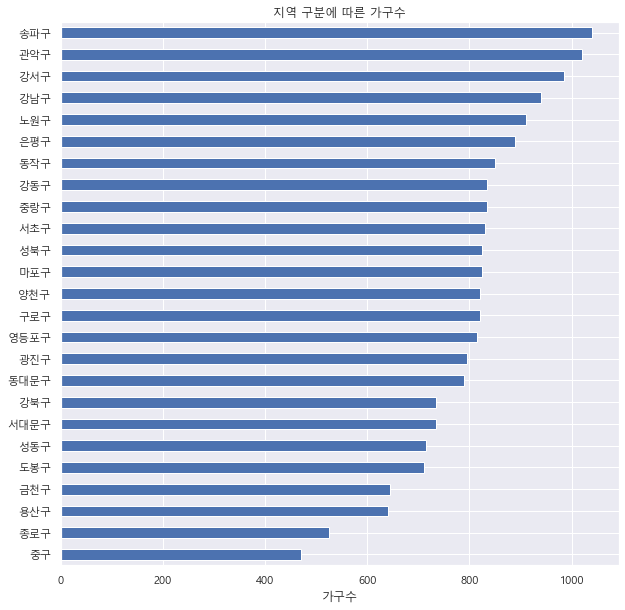

In [21]:
# 지역에 따른 가구수 시각화 
df_gu["가구수"].sort_values().plot.barh(figsize=(10,10))
plt.title("지역 구분에 따른 가구수")
plt.xlabel("가구수")
plt.show()

## 지역별 반려동물을 키우는 가구 비율
* 지역별로 반려동물을 키우는 가구수의 비율을 본다

In [22]:
# 반려동물 유무와 지역으로 그루핑해 비율을 본다. 
gu_pet_group = df.groupby(["지역","반려동물유무"])["ID"].count().unstack()
gu_pet_group["전체"] = gu_pet_group["Y"] + gu_pet_group["N"]
gu_pet_group["비율"] = gu_pet_group["Y"] / gu_pet_group["전체"]

gu_pet_group.sort_values(by="비율", ascending = False)

반려동물유무,N,Y,전체,비율
지역,,,,
광진구,599,196,795,0.246541
노원구,699,211,910,0.231868
서초구,638,192,830,0.231325
중랑구,651,184,835,0.220359
강남구,733,207,940,0.220213
성북구,648,177,825,0.214545
송파구,820,220,1040,0.211538
강북구,582,153,735,0.208163
용산구,509,131,640,0.204687


광진구가 24.6%로 반려동물을 키우는 가구 비율이 가장 높다. 그 다음으로 노원구, 서초구 중랑구 순

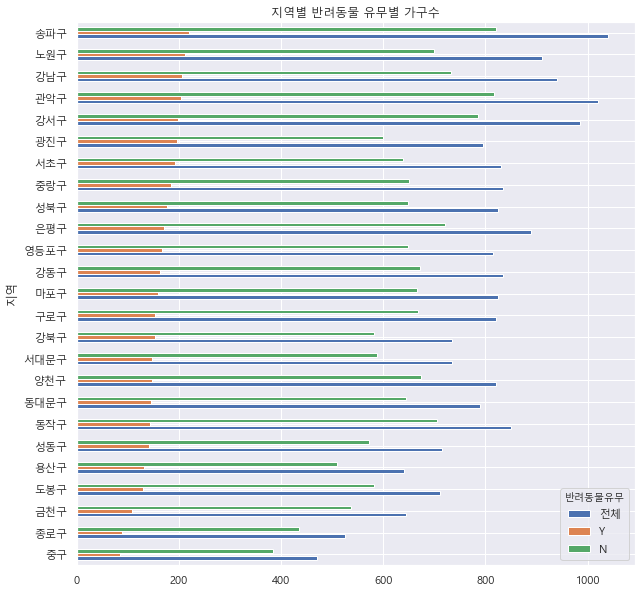

In [23]:
gu_pet_group[["전체", "Y","N"]].sort_values(by="Y").plot.barh(figsize = (10,10))
plt.title("지역별 반려동물 유무별 가구수")
plt.show()

절대적인 수에서 반려동물을 키우는 가구수가 가장 많은 곳은 송파구이다. 다음으로 노원구, 강남구, 관악구 순.

### 지역별 가구수 구성 비율
* 지역별 가구원수 구성 비율을 살펴 본다.

In [24]:
# 지역별 가구원수 구성 비율 보기 
gu_fam_group = df.groupby(["지역", "FAM1"])["ID"].count().unstack()
gu_fam_group = gu_fam_group.fillna(0)
gu_fam_group["합계"] = gu_fam_group.sum(axis=1)
gu_fam_group["5인이상"] = gu_fam_group[5] + gu_fam_group[6] + gu_fam_group[7]
gu_fam_group["1인가구비율"] = gu_fam_group[1] / gu_fam_group["합계"]
gu_fam_group["2인가구비율"] = gu_fam_group[2] / gu_fam_group["합계"]
gu_fam_group["3인가구비율"] = gu_fam_group[3] / gu_fam_group["합계"]
gu_fam_group["4인가구비율"] = gu_fam_group[4] / gu_fam_group["합계"]
gu_fam_group["5인이상비율"] = gu_fam_group["5인이상"] / gu_fam_group["합계"]
gu_fam_group.iloc[:,9:14].style.background_gradient()


FAM1,1인가구비율,2인가구비율,3인가구비율,4인가구비율,5인이상비율
지역,,,,,
강남구,0.194681,0.274468,0.314894,0.205319,0.0106383
강동구,0.111377,0.233533,0.317365,0.301796,0.0359281
강북구,0.144218,0.261224,0.359184,0.223129,0.0122449
강서구,0.186802,0.271066,0.303553,0.211168,0.0274112
관악구,0.196078,0.297059,0.269608,0.206863,0.0303922
광진구,0.21761,0.300629,0.301887,0.161006,0.0188679
구로구,0.123171,0.219512,0.287805,0.320732,0.0487805
금천구,0.299225,0.317829,0.179845,0.170543,0.0325581
노원구,0.152747,0.285714,0.325275,0.223077,0.0131868


1인 가구 비율이 가장 높은 곳은 금천구, 2인가구는 양천구, 3인가구는 종로구, 4인가구는 구로구가 비율이 가장 높았다.

In [158]:
# 반려동물을 키우는 가구의 지역별 가구원수 구성 비율 보기 
gu_fam_group_pet = df[df["반려동물유무"] == "Y"].groupby(["지역", "FAM1"])["ID"].count().unstack()
gu_fam_group_pet = gu_fam_group_pet.fillna(0)
gu_fam_group_pet["합계"] = gu_fam_group_pet.sum(axis=1)

gu_fam_group_pet["5인이상"] = gu_fam_group_pet[5] + gu_fam_group_pet[6] 
gu_fam_group_pet["1인가구비율"] = gu_fam_group_pet[1] / gu_fam_group_pet["합계"]
gu_fam_group_pet["2인가구비율"] = gu_fam_group_pet[2] / gu_fam_group_pet["합계"]
gu_fam_group_pet["3인가구비율"] = gu_fam_group_pet[3] / gu_fam_group_pet["합계"]
gu_fam_group_pet["4인가구비율"] = gu_fam_group_pet[4] / gu_fam_group_pet["합계"]
gu_fam_group_pet["5인이상비율"] = gu_fam_group_pet["5인이상"] / gu_fam_group_pet["합계"]
gu_fam_group_pet.iloc[:,8:14].style.background_gradient()

FAM1,1인가구비율,2인가구비율,3인가구비율,4인가구비율,5인이상비율
지역,,,,,
강남구,0.251208,0.323671,0.26087,0.144928,0.0193237
강동구,0.147239,0.226994,0.331288,0.226994,0.0674847
강북구,0.176471,0.359477,0.235294,0.228758,0
강서구,0.140704,0.341709,0.261307,0.226131,0.0301508
관악구,0.161765,0.25,0.284314,0.264706,0.0392157
광진구,0.244898,0.326531,0.265306,0.153061,0.0102041
구로구,0.143791,0.189542,0.346405,0.287582,0.0326797
금천구,0.366972,0.238532,0.238532,0.146789,0.00917431
노원구,0.161137,0.345972,0.331754,0.151659,0.00947867


### 지역별 여성 1인가구 비율
* 반려동물 

In [130]:
f_counts = df.loc[(df["FAM1"]  == 1) & (df["성별"] == "여"), :]["지역"].value_counts()
f_counts = f_counts.to_frame("여성1인가구")

In [131]:
a_counts = df["지역"].value_counts()
a_counts= a_counts.to_frame("전체가구")

In [138]:
b_counts =  f_counts.merge(a_counts, left_index = True ,right_index = True)
b_counts["여성1인가구 비율"] = b_counts["여성1인가구"] / b_counts["전체가구"] * 100
b_counts.sort_values("여성1인가구 비율", ascending = False)

,여성1인가구,전체가구,여성1인가구 비율
금천구,96,645,14.883721
마포구,118,825,14.303030
양천구,115,820,14.024390
송파구,140,1040,13.461538
동대문구,105,790,13.291139
중구,60,470,12.765957
종로구,67,525,12.761905
용산구,78,640,12.187500
서초구,99,830,11.927711
관악구,121,1020,11.862745


# 반려동물 취득경로

## 취득경로 코드 변환
* 숫자로 되어있는 취득 경로를 구분 편의를 위해 파일의 코드북을 참고하여 변환.
```
1.동물판매업소(애견판매업소, 동물병원 등)
2.친지, 친구 등 아는 사람을 통해 유상 입양
3.친지, 친구 등 아는 사람을 통해 무상 입양
4.인터넷을 통해 구입
5.유기동물 입양
6.원래 기르던 동물이 낳은 새끼
7.기타"
```


In [26]:
# 코드로 되어있는 반려동물 취득경로를 식별하기 위해 딕셔너리 생성(data파일의 코드북 참고)

pet_route = {
'1.0':'동물판매업소',
'2.0':'친지, 친구 등 아는 사람을 통해 유상 입양',
'3.0':'친지, 친구 등 아는 사람을 통해 무상 입양',
'4.0':'인터넷을 통해 구입',
'5.0':'유기동물 입양',
'6.0':'원래 기르던 동물이 낳은 새끼',
'7.0':'기타',
}

pet_route

{'1.0': '동물판매업소',
 '2.0': '친지, 친구 등 아는 사람을 통해 유상 입양',
 '3.0': '친지, 친구 등 아는 사람을 통해 무상 입양',
 '4.0': '인터넷을 통해 구입',
 '5.0': '유기동물 입양',
 '6.0': '원래 기르던 동물이 낳은 새끼',
 '7.0': '기타'}

In [27]:
# 한글로 바꾸어준 취득경로 '반려동물취득경로' 컬럼으로 만들어줌 

df_pet['반려동물취득경로'] = df_pet['Q7_1'].astype('str').replace(pet_route)

In [28]:
df_pet[{'Q7_1', '반려동물취득경로'}]

,Q7_1,반려동물취득경로
182,5.0,유기동물 입양
183,5.0,유기동물 입양
184,2.0,"친지, 친구 등 아는 사람을 통해 유상 입양"
185,5.0,유기동물 입양
186,3.0,"친지, 친구 등 아는 사람을 통해 무상 입양"
...,...,...
19971,5.0,유기동물 입양
19978,3.0,"친지, 친구 등 아는 사람을 통해 무상 입양"
19991,3.0,"친지, 친구 등 아는 사람을 통해 무상 입양"
19993,1.0,동물판매업소


In [29]:
#  빈도수와 비율 살펴보기
pet_route_count = pd.DataFrame(df_pet['반려동물취득경로'].value_counts())
pet_route_per = pd.DataFrame(df_pet['반려동물취득경로'].value_counts(normalize=True))

pet_route = pet_route_count.merge(
    pet_route_per, left_index=True, right_index=True)

pet_route.columns = ['응답수', '비율']

pet_route

,응답수,비율
"친지, 친구 등 아는 사람을 통해 무상 입양",1464,0.363908
동물판매업소,1017,0.252796
"친지, 친구 등 아는 사람을 통해 유상 입양",744,0.184937
유기동물 입양,430,0.106885
원래 기르던 동물이 낳은 새끼,236,0.058663
인터넷을 통해 구입,132,0.032811


반려동물을 키우고 있는 가정의 반려동물 취득경로는 아는사람을 통한 무상입양이 36.3%로 가장 많았다. 그 다음으로 동물 판매업소, 아는사람들을 통한 유상 입양, 유기동물 입양 순이었다. 

# 반려동물 종류

In [30]:
# 반려동물을 키우는 가구중 개를 키우는 가구
dog = len(df_pet[df_pet['Q7_2A1'] > 0])
print("가구수: ",dog) 
print("비율 : ", round(dog / 4023 * 100, 2))

가구수:  3607
비율 :  89.66


In [31]:
# 개를 키우는 가구 중 두마리 이상 키우는 가구
dog2 = len(df_pet[df_pet['Q7_2A1'] > 1])
print("가구수: ",dog2) 
print("비율 : ", round(dog2 / dog * 100, 2))

가구수:  516
비율 :  14.31


개를 키우는 가구 중 2 마리 이상 키우는 가구

In [32]:
cat = len(df_pet[df_pet['Q7_2A2'] > 0])
cat

508

고양이를 키우는 가구 수

In [33]:
len(df_pet[df_pet['Q7_2A2'] > 1])

187

고양이를 두마리 이상 키우는 가구

In [34]:
orthers = len(df_pet[df_pet['Q7_2A3'] > 0])
orthers

99

기타 동물을 키우는 가구수 

In [35]:
dog_cat = len(df_pet[(df_pet['Q7_2A2'] > 0) & (df_pet['Q7_2A1'] > 0) & (df_pet['Q7_2A3'] == 0)])
dog_cat

106

개와 고양이 함께 키우는 가구 수

In [36]:
dog_others = len(df_pet[(df_pet['Q7_2A3'] > 0) & (df_pet['Q7_2A1'] > 0) & (df_pet['Q7_2A2'] == 0)])
dog_others

84

개와 기타 동울을 함께 키우는 가구수 

In [37]:
cat_others = len(df_pet[(df_pet['Q7_2A3'] > 0) & (df_pet['Q7_2A2'] > 0) & (df_pet['Q7_2A1'] == 0)])
cat_others

1

고양이와 기타동물을 함께 키우는 가구수 

In [38]:
dog_cat_others = len(df_pet[(df_pet['Q7_2A3'] > 0) & (df_pet['Q7_2A2'] > 0) & (df_pet['Q7_2A1'] > 0)])
dog_cat_others

0

개, 고양이, 기타 동물을 함께 키우는 가구수 

In [39]:
only_dog = len(df_pet[(df_pet['Q7_2A1'] > 0) & (df_pet['Q7_2A2'] == 0)  & (df_pet['Q7_2A3'] == 0)])
only_dog

3417

개만키우는 가구 수 

In [40]:
only_cat = len(df_pet[(df_pet['Q7_2A2'] > 0) & (df_pet['Q7_2A1'] == 0) & (df_pet['Q7_2A3'] == 0)])
only_cat

401

고양이만 키우는 가구수 

In [41]:
only_others = len(df_pet[(df_pet['Q7_2A3'] > 0) & (df_pet['Q7_2A1'] == 0) & (df_pet['Q7_2A2'] == 0)])
only_others

14

기타 동물만 키우는 가구 수 

In [42]:
only_dog + only_cat + only_others + dog_cat + dog_others + cat_others

4023

In [43]:
df_pat_per = pd.DataFrame({"반려동물 종류" : [only_dog, only_cat, only_others, dog_cat, dog_others, cat_others]}
                          ,index = ["only_dog", "only_cat", "only_others", "dog & cat", "dog & others", "cat & others"]
)
df_pat_per["비율"] = df_pat_per["반려동물 종류"] / 4023 * 100

In [44]:
df_pat_per.sort_values(by= "비율", ascending=False)

,반려동물 종류,비율
only_dog,3417,84.936614
only_cat,401,9.967686
dog & cat,106,2.634850
dog & others,84,2.087994
only_others,14,0.347999
cat & others,1,0.024857


전체 반려 동물을 키우는 가구 중 강아지만 키우는 가구가 84.93%, 고양이만 키우는 가구는 9.96%, 고양이와 개를 함께 키우는 가구는 2.63%, 개와 기타동물을 키우는 가구는 2.08%로 나타났다.

Text(0.5, 1.0, '키우는 반려동물의 종류')

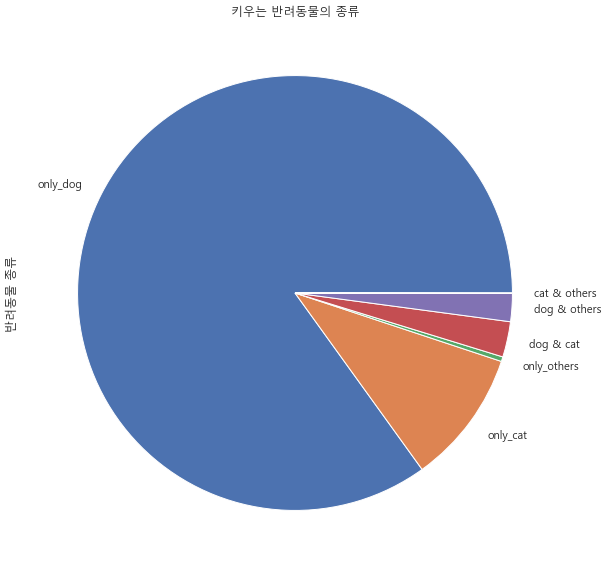

In [45]:
df_pat_per["반려동물 종류"].plot.pie(figsize = (10,10))
plt.title("키우는 반려동물의 종류")

# 소득
* 소득 따른 구분으로 반려동물 가구를 분석

In [46]:
df['AQ1'].unique()

array([ 6,  8, 13, 12, 11,  5,  4, 18,  9, 10, 16, 14,  2, 15, 17,  7, 19,
        3,  1], dtype=int64)

소득 구분이 코드로 되어있다.

## 소득 코드 변환
* 소득에 대한 문항
* AQ1. 귀댁의 지난 1년 동안 세금납부(공제)전의 월평균 총 가구소득은 얼마입니까?
```
1.50만원 미만
2.50˜100만원 미만
3.100˜150만원 미만
4.150˜200만원 미만
5.200˜250만원 미만
6.250˜300만원 미만
7.300˜350만원 미만
8.350˜400만원 미만
9.400˜450만원 미만
10.450˜500만원 미만
11.500˜550만원 미만
12.550˜600만원 미만
13.600˜650만원 미만
14.650˜700만원 미만
15.700˜750만원 미만
16.750˜800만원 미만
17.800˜850만원 미만
18.850˜900만원 미만
19.900만원 이상
```

In [47]:
# 데이터 코드북 시트에서 소득 구분을 편집하여 저장파일 불러오기 
df_survay_income = pd.read_csv("data/survay_income.csv")
df_survay_income.columns = ["소득코드", "소득구분"]
df_survay_income

,소득코드,소득구분
0,1,50만원 미만
1,2,50˜100만원 미만
2,3,100˜150만원 미만
3,4,150˜200만원 미만
4,5,200˜250만원 미만
5,6,250˜300만원 미만
6,7,300˜350만원 미만
7,8,350˜400만원 미만
8,9,400˜450만원 미만
9,10,450˜500만원 미만


In [48]:
# 데이터프레임에 소득구분 합쳐주기
df= df.merge(df_survay_income, left_on='AQ1', right_on="소득코드", how="left")
df

,date,ID,GU,FAM1,FAM2,SQ0_2,SQ0_3,SQ1_1,SQ1_2,SQ1_3,...,AQ1A,A_DQ1,A_DQ3,wta1,wta2,반려동물유무,코드,지역,소득코드,소득구분
0,20200527,1,110,2,2,1,1,1,1,1945,...,NaN,4,12,75.030,0.391,N,110,종로구,6,250˜300만원 미만
1,20200527,2,110,3,3,1,1,1,1,1962,...,NaN,5,5,29.759,0.155,N,110,종로구,8,350˜400만원 미만
2,20200527,3,110,5,5,1,1,1,1,1961,...,NaN,4,4,215.428,1.122,N,110,종로구,13,600˜650만원 미만
3,20200527,4,110,4,2,1,2,1,1,1978,...,NaN,5,3,66.538,0.347,N,110,종로구,12,550˜600만원 미만
4,20200527,5,110,3,3,1,1,1,1,1950,...,NaN,6,5,39.131,0.204,N,110,종로구,8,350˜400만원 미만
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,20200527,19996,740,2,2,4,1,1,1,1950,...,NaN,4,12,93.184,0.485,N,740,강동구,5,200˜250만원 미만
19996,20200527,19997,740,3,3,2,3,1,1,1973,...,NaN,6,7,590.369,3.075,N,740,강동구,9,400˜450만원 미만
19997,20200527,19998,740,2,2,4,1,1,1,1950,...,NaN,4,12,93.184,0.485,N,740,강동구,5,200˜250만원 미만
19998,20200527,19999,740,1,1,4,2,1,1,1985,...,NaN,6,3,124.678,0.649,N,740,강동구,7,300˜350만원 미만


In [49]:
# 전체가구 소득구분 빈도수 계산 
df['소득구분'].value_counts()

500˜550만원 미만    2124
300˜350만원 미만    2064
400˜450만원 미만    1933
450˜500만원 미만    1422
200˜250만원 미만    1416
350˜400만원 미만    1411
250˜300만원 미만    1395
600˜650만원 미만    1358
550˜600만원 미만    1235
150˜200만원 미만     975
650˜700만원 미만     796
700˜750만원 미만     794
100˜150만원 미만     761
50˜100만원 미만      630
750˜800만원 미만     447
800˜850만원 미만     432
900만원 이상         373
850˜900만원 미만     323
50만원 미만          111
Name: 소득구분, dtype: int64

500˜550만원 미만 구분이 2124가구로 가장 많다.

In [50]:
# 반려동물을 키우는 가구 소득 빈도수 계산
df.loc[df['반려동물유무'] == "Y", "소득구분"].value_counts()

500˜550만원 미만    447
300˜350만원 미만    375
400˜450만원 미만    367
200˜250만원 미만    309
450˜500만원 미만    303
600˜650만원 미만    296
250˜300만원 미만    285
350˜400만원 미만    274
550˜600만원 미만    240
150˜200만원 미만    213
700˜750만원 미만    169
650˜700만원 미만    166
100˜150만원 미만    110
750˜800만원 미만    106
900만원 이상        104
800˜850만원 미만    102
850˜900만원 미만     89
50˜100만원 미만      53
50만원 미만          15
Name: 소득구분, dtype: int64

## 소득 구분에 따른 반려동물 가구 비율
* 소득 구분에 따라서 반려동물 유무의 비율을 계산

In [51]:
income_pat_group = df.groupby(["소득구분", "반려동물유무"] )["ID"].count().unstack()
income_pat_group["전체"] = income_pat_group["Y"] + income_pat_group["N"]
income_pat_group["Y_비율"] = income_pat_group["Y"] / income_pat_group["전체"]
income_pat_group.sort_values(by="Y_비율", ascending=False)

반려동물유무,N,Y,전체,Y_비율
소득구분,,,,
900만원 이상,269,104,373,0.278820
850˜900만원 미만,234,89,323,0.275542
750˜800만원 미만,341,106,447,0.237136
800˜850만원 미만,330,102,432,0.236111
150˜200만원 미만,762,213,975,0.218462
200˜250만원 미만,1107,309,1416,0.218220
600˜650만원 미만,1062,296,1358,0.217968
450˜500만원 미만,1119,303,1422,0.213080
700˜750만원 미만,625,169,794,0.212846


대체로 고소득자가 많은 가운데, 150˜200만원 미만(21.8%), 200˜250만원 미만(21.8%)로 중 하위 소득자가 껴 있다. 가구원수에 따라 소득의 크기가 달라질 수 있기 때문에 가구원 수로 구분으로 살펴봐야 할 것 같음.

## 1인 가구 소득에 따른 반려동물 가구 비율

In [52]:
# 1인가구로 dataframe 생성
df_1p = df[df['FAM1'] == 1]
df_1p.head()

,date,ID,GU,FAM1,FAM2,SQ0_2,SQ0_3,SQ1_1,SQ1_2,SQ1_3,...,AQ1A,A_DQ1,A_DQ3,wta1,wta2,반려동물유무,코드,지역,소득코드,소득구분
23,20200527,24,110,1,1,3,3,1,2,1951,...,NaN,3,11,2350.942,12.245,N,110,종로구,2,50˜100만원 미만
65,20200527,66,110,1,1,5,3,1,1,1990,...,NaN,5,3,225.829,1.176,N,110,종로구,5,200˜250만원 미만
66,20200527,67,110,1,1,5,3,1,2,1988,...,NaN,4,4,379.746,1.978,N,110,종로구,4,150˜200만원 미만
67,20200527,68,110,1,1,5,3,1,2,1987,...,NaN,6,4,296.949,1.547,N,110,종로구,5,200˜250만원 미만
68,20200527,69,110,1,1,5,3,1,2,1985,...,NaN,6,7,296.949,1.547,N,110,종로구,7,300˜350만원 미만


In [53]:
# 소득에 따른 반려동물 가구 비율 보기
income_pat_group = df_1p.groupby(["소득구분", "반려동물유무"] )["ID"].count().unstack()
income_pat_group["전체"] = income_pat_group["Y"] + income_pat_group["N"]
income_pat_group["Y_비율"] = income_pat_group["Y"] / income_pat_group["전체"]
income_pat_group.sort_values(by="Y_비율", ascending=False)

반려동물유무,N,Y,전체,Y_비율
소득구분,,,,
750˜800만원 미만,2.0,3.0,5.0,0.600000
450˜500만원 미만,31.0,18.0,49.0,0.367347
500˜550만원 미만,30.0,15.0,45.0,0.333333
650˜700만원 미만,10.0,5.0,15.0,0.333333
550˜600만원 미만,13.0,6.0,19.0,0.315789
350˜400만원 미만,148.0,59.0,207.0,0.285024
600˜650만원 미만,18.0,7.0,25.0,0.280000
850˜900만원 미만,8.0,3.0,11.0,0.272727
700˜750만원 미만,17.0,6.0,23.0,0.260870


```
750˜800만원 미만 구간에서는 60%의 가구가 반려동물을 키우고, 450˜500만원 미만 구간은 36.7%, 500˜550만원 미만 구간은 33.3% 의 가구가 반려동물을 키우고 있다. 
150만원 미만 소득 부터 부터 반려동물을 키우는 가구 비율이 급격하게 떨어진다.
```

In [54]:
df_1p_income = income_pat_group.merge(df_survay_income, left_on="소득구분", right_on="소득구분")

In [55]:
df_1p_income = df_1p_income.sort_values(by= "소득코드")
df_1p_income = df_1p_income.set_index("소득구분")


In [56]:
# 값이 없는 데이터는 삭제
df_1p_income = df_1p_income.dropna()

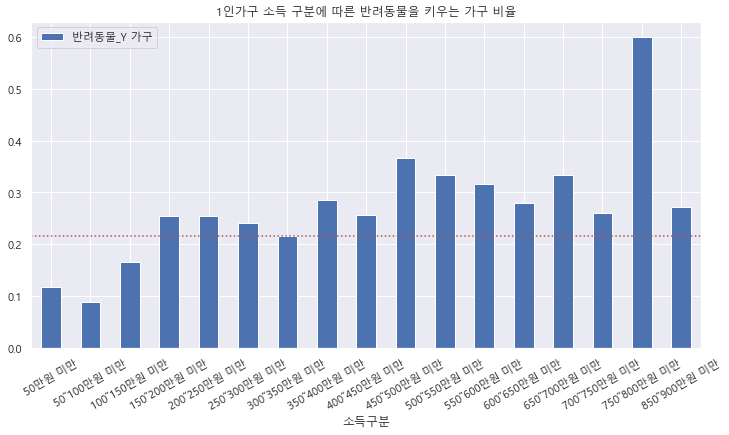

In [57]:
# 시각화
df_1p_income["Y_비율"].plot.bar(figsize = (12,6), rot=30, label= "반려동물_Y 가구")
plt.axhline(y=0.216330, linestyle =":", color = "r")
plt.title("1인가구 소득 구분에 따른 반려동물을 키우는 가구 비율")
plt.legend()
plt.show()

```
150만원 미만의 1인 가구부터 반려동물을 키우는 가구수 비율이 급격하게 떨어짐. 750˜800만원 미만 구간은 표본의 수가 적기 때문에 타당도가 떨어질 수 있음.
빨간선은 전체 1인 가구 중 반려동물을 키우는 가구의 비율
```

## 2인 가구 소득에 따른 반려동물 가구 비율

In [58]:
# 2인가구로 dataframe 생성
df_2p = df[df['FAM1'] == 2]
df_2p.head()

,date,ID,GU,FAM1,FAM2,SQ0_2,SQ0_3,SQ1_1,SQ1_2,SQ1_3,...,AQ1A,A_DQ1,A_DQ3,wta1,wta2,반려동물유무,코드,지역,소득코드,소득구분
0,20200527,1,110,2,2,1,1,1,1,1945,...,NaN,4,12,75.030,0.391,N,110,종로구,6,250˜300만원 미만
6,20200527,7,110,2,2,1,1,1,1,1946,...,NaN,3,5,256.565,1.336,N,110,종로구,5,200˜250만원 미만
7,20200527,8,110,2,2,1,1,1,1,1943,...,NaN,6,12,58.671,0.306,N,110,종로구,4,150˜200만원 미만
10,20200527,11,110,2,2,1,1,1,2,1968,...,NaN,4,5,75.030,0.391,N,110,종로구,6,250˜300만원 미만
12,20200527,13,110,2,2,1,1,1,1,1948,...,NaN,4,12,75.030,0.391,N,110,종로구,9,400˜450만원 미만


In [59]:
# 소득에 따른 반려동물 가구 비율 보기
income_pat_group = df_2p.groupby(["소득구분", "반려동물유무"] )["ID"].count().unstack()
income_pat_group["전체"] = income_pat_group["Y"] + income_pat_group["N"]
income_pat_group["Y_비율"] = income_pat_group["Y"] / income_pat_group["전체"]
income_pat_group.sort_values(by="Y_비율", ascending=False)

반려동물유무,N,Y,전체,Y_비율
소득구분,,,,
850˜900만원 미만,13,10,23,0.434783
750˜800만원 미만,27,19,46,0.413043
650˜700만원 미만,84,35,119,0.294118
700˜750만원 미만,65,27,92,0.293478
600˜650만원 미만,181,70,251,0.278884
450˜500만원 미만,288,104,392,0.265306
900만원 이상,20,7,27,0.259259
350˜400만원 미만,312,100,412,0.242718
550˜600만원 미만,203,65,268,0.242537


In [60]:
df_2p_income = income_pat_group.merge(df_survay_income, left_on="소득구분", right_on="소득구분")

In [61]:
df_2p_income = df_2p_income.sort_values(by= "소득코드")
df_2p_income = df_2p_income.set_index("소득구분")

In [62]:
df_2p_income

,N,Y,전체,Y_비율,소득코드
소득구분,,,,,
50만원 미만,11,3,14,0.214286,1
50˜100만원 미만,126,10,136,0.073529,2
100˜150만원 미만,296,40,336,0.119048,3
150˜200만원 미만,399,88,487,0.180698,4
200˜250만원 미만,530,133,663,0.200603,5
250˜300만원 미만,416,114,530,0.215094,6
300˜350만원 미만,577,142,719,0.197497,7
350˜400만원 미만,312,100,412,0.242718,8
400˜450만원 미만,441,107,548,0.195255,9


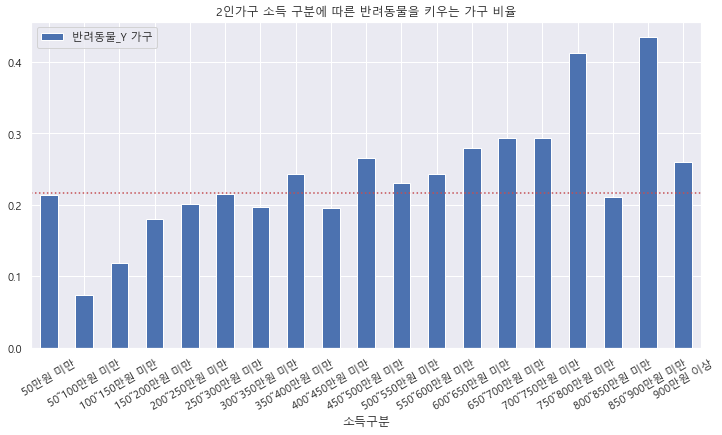

In [63]:
# 시각화
df_2p_income["Y_비율"].plot.bar(figsize = (12,6), rot=30, label="반려동물_Y 가구")
plt.axhline(y=0.216330, linestyle =":", color = "r")
plt.title("2인가구 소득 구분에 따른 반려동물을 키우는 가구 비율")
plt.legend()
plt.show()


2인 가구에서도 고소득 구간에서 반려동물을 키우는 가구 비율이 높은편이다.

# 주거 형태에 따른 구분

## 주거형태 컬럼 변환

* 주거 형태에 대한 문항
```
1.단독주택
2.아파트
3.다세대주택
4.연립주택/빌라
5.기타"
```

In [141]:
# 주거형태 컬럼 만들어주기 
df["SQ0_2"].unique()

array([1, 3, 4, 2, 5], dtype=int64)

1.단독주택
2.아파트
3.다세대주택
4.연립주택/빌라
5.기타

In [142]:
house = {"1":"단독주택", "2":"아파트", "3":"다세대주택", "4":"연립주택/빌라", "5":"기타"}
house

{'1': '단독주택', '2': '아파트', '3': '다세대주택', '4': '연립주택/빌라', '5': '기타'}

In [143]:
df['주거형태'] = df['SQ0_2'].astype('str').replace(house)

In [146]:
house_count = df['주거형태'].value_counts()
house_count_pat = df[df["반려동물유무"] == "Y"]['주거형태'].value_counts()

## 주거형태에 따른 빈도 시각화

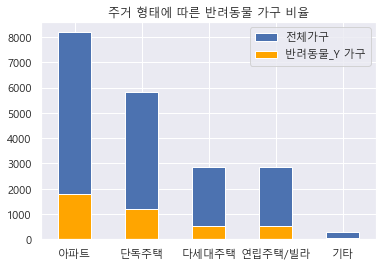

In [147]:
a= house_count.plot.bar(rot=0, label = "전체가구")
b= house_count_pat.plot.bar(rot=0, color="orange" , label = "반려동물_Y 가구")
plt.title("주거 형태에 따른 반려동물 가구 비율")
a.legend()
plt.show()


In [148]:
house_pat_group = df.groupby(["주거형태", "반려동물유무"])["ID"].count().unstack()
house_pat_group["전체"] = house_pat_group["Y"] + house_pat_group["N"]
house_pat_group["Y_비율"] = house_pat_group["Y"] / house_pat_group["전체"]
house_pat_group.sort_values(by="Y_비율", ascending=False)

반려동물유무,N,Y,전체,Y_비율
주거형태,,,,
아파트,6411,1775,8186,0.216834
단독주택,4620,1184,5804,0.203997
다세대주택,2335,516,2851,0.180989
연립주택/빌라,2357,515,2872,0.179318
기타,254,33,287,0.114983


주거형태 구분에서 반려동물을 키우는 가구의 비율은 전체 집단의 분포와 차이가 없음

# 생활환경 만족도에 따른 구분

## 사회환경 만족도 
* 문6-3. 생활환경 만족도_사회환경
```
1.매우 불만족
2.약간 불만족
3.보통
4.약간 만족
5.매우 만족
```

In [149]:
# 전체집단에 대한 빈도 분석 
Q1_count = df["Q6A3"].value_counts(normalize=True).to_frame("전체가구")
Q1_count

,전체가구
4,0.39460
3,0.37620
2,0.13585
5,0.07710
1,0.01625


In [150]:
# 반려동물을 키우는 가구에 대한 대한 빈도 분석 
Q1_count_pet =df[df["반려동물유무"] == "Y"]["Q6A3"].value_counts(normalize=True).to_frame("반려동물_Y 가구")
Q1_count_pet

,반려동물_Y 가구
3,0.393487
4,0.340045
2,0.175739
5,0.063137
1,0.027591


In [151]:
df_Q6A3 = Q1_count.merge(Q1_count_pet, left_index= True, right_index = True)
df_Q6A3

,전체가구,반려동물_Y 가구
4,0.39460,0.340045
3,0.37620,0.393487
2,0.13585,0.175739
5,0.07710,0.063137
1,0.01625,0.027591


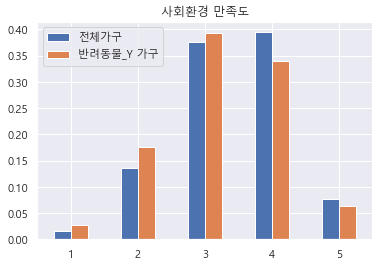

In [152]:
df_Q6A3.sort_index().plot.bar(rot= 0)
plt.title("사회환경 만족도")
plt.show()

반려동물을 키우는 가구가 사회 환경 만족도에 대해서 더 낮게 나타남

## 주거환경 만족도 
* 문6-3. 생활환경 만족도_사회환경
```
1.매우 불만족
2.약간 불만족
3.보통
4.약간 만족
5.매우 만족
```

In [153]:
# 전체집단에 대한 빈도 분석 
Q2_count = df["Q6A1"].value_counts(normalize=True).to_frame("전체가구")
Q2_count

,전체가구
4,0.48905
3,0.33805
2,0.08265
5,0.08145
1,0.00880


In [154]:
# 반려동물을 키우는 가구에 대한 대한 빈도 분석 
Q2_count_pet = df[df["반려동물유무"] == "Y"]["Q6A1"].value_counts(normalize=True).to_frame("반려동물_Y 가구")
Q2_count_pet

,반려동물_Y 가구
4,0.410639
3,0.399453
2,0.108625
5,0.068108
1,0.013174


In [155]:
df_Q6A1 = Q2_count.merge(Q2_count_pet, left_index= True, right_index = True)

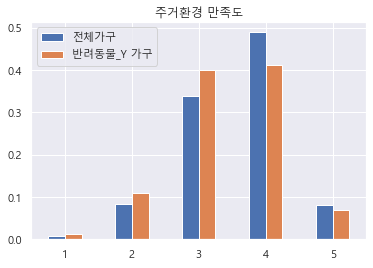

In [156]:
df_Q6A1.sort_index().plot.bar(rot= 0)
plt.title("주거환경 만족도")
plt.show()

반려동물을 키우는 가구가 주거 환경 만족도에서도 더 낮게 나타남